In [85]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#  Q.1 Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [86]:
df=pd.read_csv('50_Startups.csv')

In [87]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [88]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [89]:
df.shape

(50, 5)

In [90]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [91]:
# No null values
df.isna().sum() 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [92]:
df.drop("State", axis = 1, inplace=True)
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [93]:
df1=df.rename({'R&D Spend':'RD', 'Marketing Spend' : 'Mrkt', 'Administration' : 'Adms','Profit' : 'Prft'}, axis=1)

In [94]:

df1

,RD,Adms,Mrkt,Prft
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [95]:

# No Duplicates
df1[df1.duplicated()]

,RD,Adms,Mrkt,Prft


# Correlation_Matrix

In [96]:
df1.corr()

,RD,Adms,Mrkt,Prft
RD,1.000000,0.241955,0.724248,0.972900
Adms,0.241955,1.000000,-0.032154,0.200717
Mrkt,0.724248,-0.032154,1.000000,0.747766
Prft,0.972900,0.200717,0.747766,1.000000


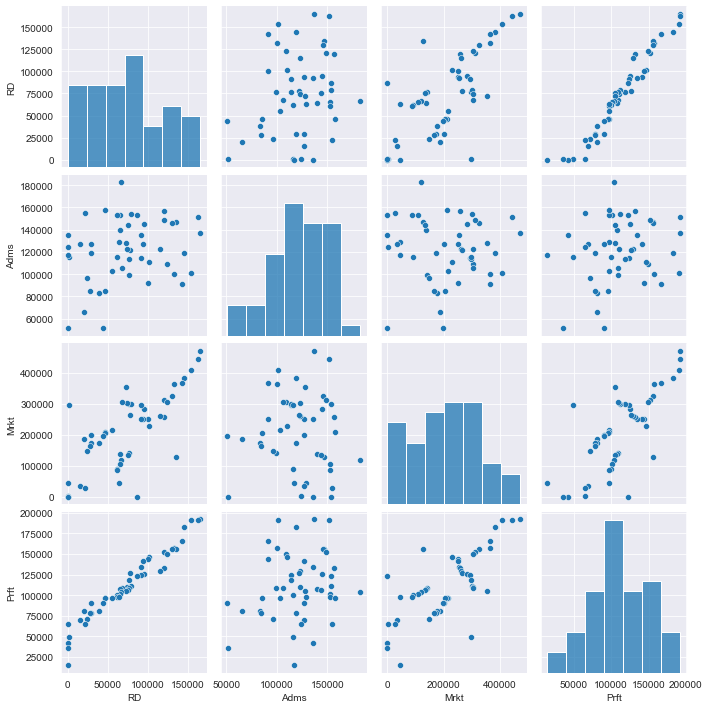

In [97]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

In [98]:
#Build model
model = smf.ols('Prft~RD+Mrkt+Adms',data=df1).fit()

In [15]:
# Model Testing

In [99]:
model.params

Intercept    50122.192990
RD               0.805715
Mrkt             0.027228
Adms            -0.026816
dtype: float64

In [100]:
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 Mrkt          1.655077
 Adms         -0.525507
 dtype: float64,
 Intercept    0.00000
 RD           0.00000
 Mrkt         0.10472
 Adms         0.60176
 dtype: float64)

In [101]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [102]:
#Build SLR and MLR model for insignificant variables 'Adms' and 'Mrkt'
#also find their tvalues and pvalues

ml_p=smf.ols('Prft~Adms',data=df1).fit()
ml_p.tvalues, ml_p.pvalues

(Intercept    3.040044
 Adms         1.419493
 dtype: float64,
 Intercept    0.003824
 Adms         0.162217
 dtype: float64)

In [103]:
ml_p=smf.ols('Prft~Mrkt',data = df1).fit()  
ml_p.tvalues,ml_p.pvalues

(Intercept    7.808356
 Mrkt         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mrkt         4.381073e-10
 dtype: float64)

In [104]:
ml_p=smf.ols('Prft~Adms+Mrkt',data = df1).fit()  
ml_p.tvalues,ml_p.pvalues 

(Intercept    1.142741
 Adms         2.467779
 Mrkt         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Adms         1.729198e-02
 Mrkt         9.727245e-11
 dtype: float64)

 Calculating VIF

In [105]:

rsq_RD = smf.ols('RD~Mrkt+Adms', data = df1).fit().rsquared
vif_RD = 1/(1-rsq_RD)
rsq_Mrkt = smf.ols('Mrkt~RD+Adms', data = df1).fit().rsquared
vif_Mrkt = 1/ (1-rsq_Mrkt)
rsq_Adms = smf.ols('Adms~Mrkt+RD', data = df1).fit().rsquared
vif_Adms = 1/(1-rsq_Adms)

d = {'Variable': ['RD','Mrkt','Adms'], 'VIF': [vif_RD,vif_Mrkt,vif_Adms]}
d1 = pd.DataFrame(d)
d1

,Variable,VIF
0,RD,2.468903
1,Mrkt,2.326773
2,Adms,1.175091


#Residual Analysis

Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

In [106]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [107]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal Q-Q Plot of residuals')

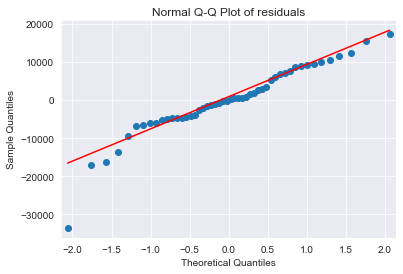

In [108]:
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residuals")

In [109]:
list(np.where(model.resid<-30000))


[array([49], dtype=int64)]

In [110]:
# Residual plot for Homoscedasticity or Heteroscedasticity

In [111]:
model = smf.ols('Prft~Mrkt+RD+Adms', data = df1).fit()

In [112]:
def get_standardized_values(vals): return(vals - vals.mean())/vals.std()
#get_standardized_values(df1)

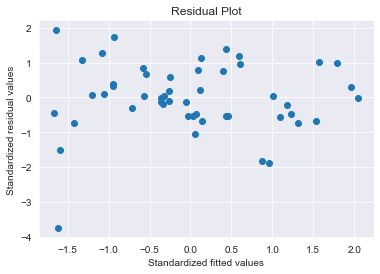

In [113]:
# plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()

In [114]:
# Residual Vs Regressors

eval_env: 1


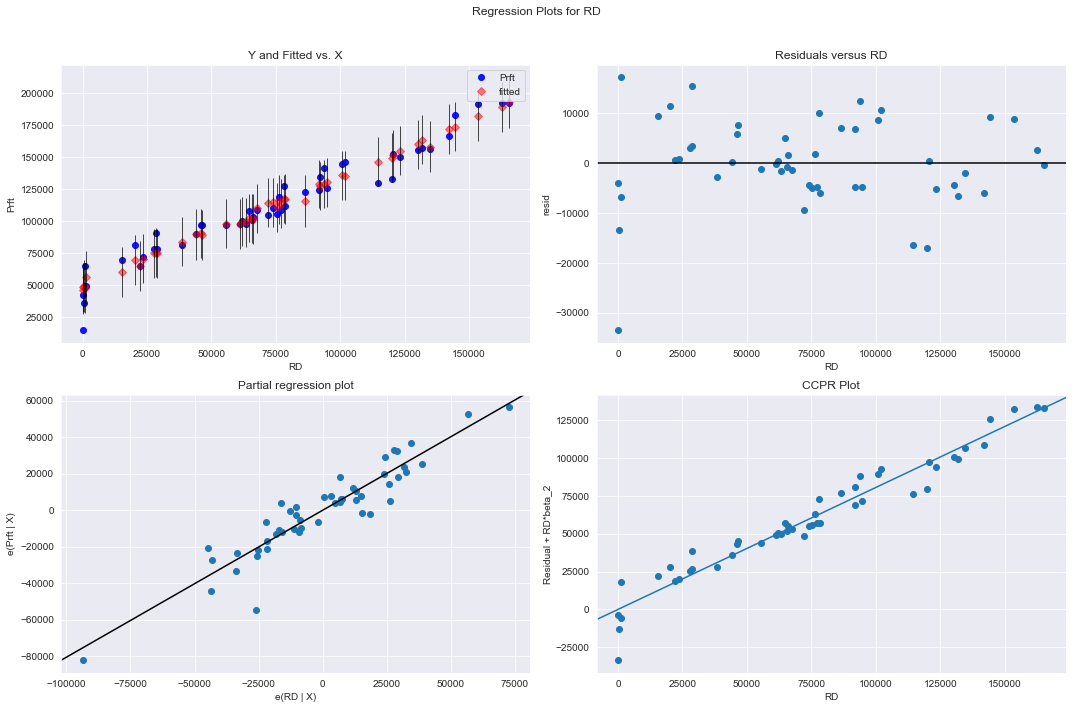

In [115]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"RD", fig = fig)
plt.show()

eval_env: 1


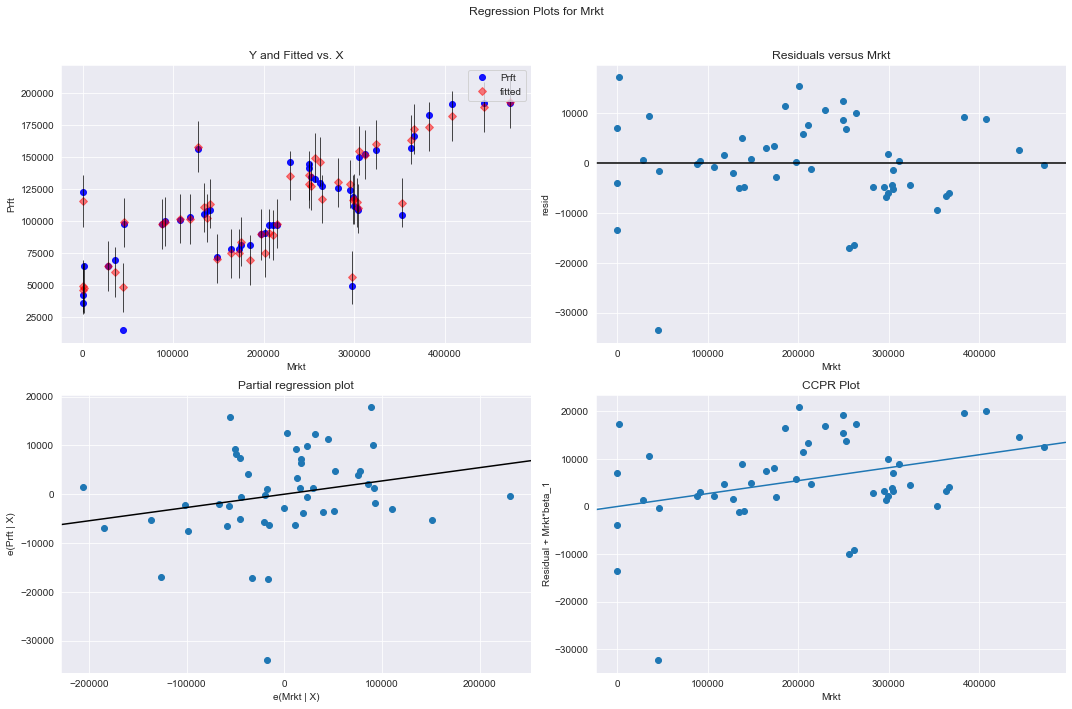

In [116]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model, "Mrkt", fig = fig)
plt.show()

eval_env: 1


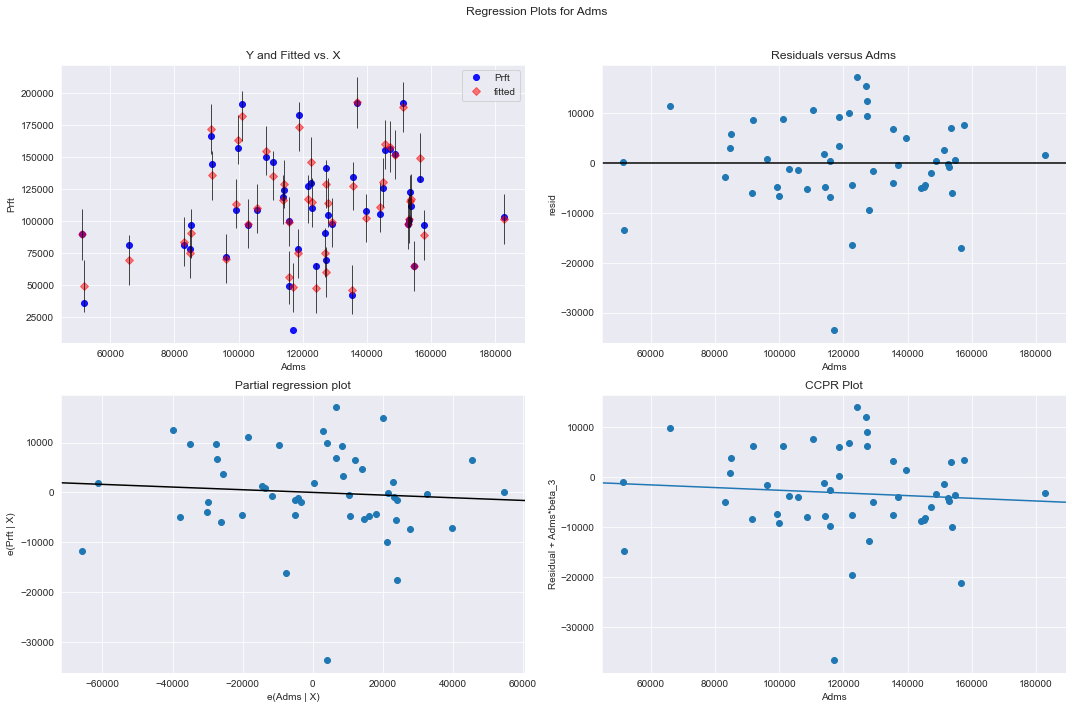

In [117]:
fig = plt.figure(figsize = (15,10))
fig =  sm.graphics.plot_regress_exog(model, "Adms", fig = fig) 
plt.show()

In [118]:
# Cook's Distance
from statsmodels.graphics.regressionplots import influence_plot

In [119]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

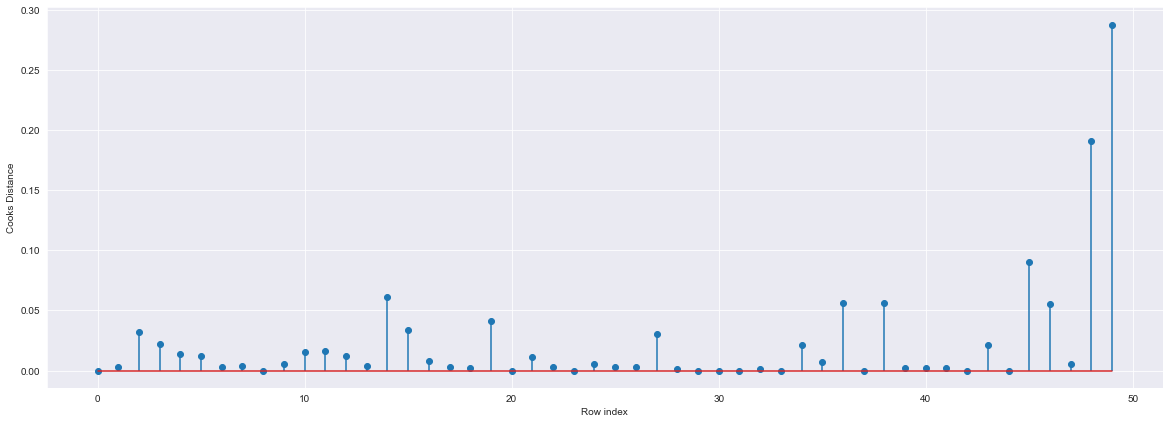

In [120]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [121]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

In [122]:
df1.shape

(50, 4)

In [123]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

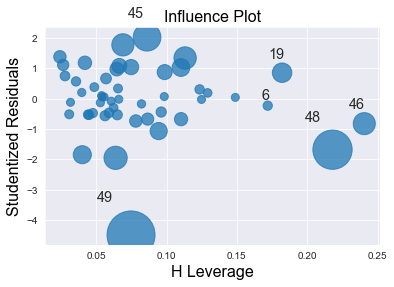

In [124]:
influence_plot(model)
plt.show()

In [125]:
df1[df1.index.isin([49])]

,RD,Adms,Mrkt,Prft
49,0.0,116983.8,45173.06,14681.4


In [128]:
df2=df1.drop(df1.index[49], axis=0).reset_index()
df2.drop(['index'], axis=1, inplace=True)
df2
#df2

,RD,Adms,Mrkt,Prft
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [127]:
# Build Model

In [129]:
final_Adms = smf.ols('Prft~RD+Adms',data = df2).fit()

In [130]:
(final_Adms.rsquared, final_Adms.aic, final_Adms.bic)

(0.9584519070123048, 1022.0654576388338, 1027.7409185331658)

In [131]:
final_Mrkt= smf.ols('Prft~RD+Mrkt',data = df2).fit()

In [132]:
(final_Mrkt.rsquared, final_Mrkt.aic, final_Mrkt.bic)

(0.9610856807456628, 1018.8564801588338, 1024.5319410531658)

In [133]:
# Cook's Distance

In [134]:
model_influence_Mrkt = final_Mrkt.get_influence()
(c_M, _) = model_influence_Mrkt.cooks_distance

Text(0, 0.5, 'Cooks Distance')

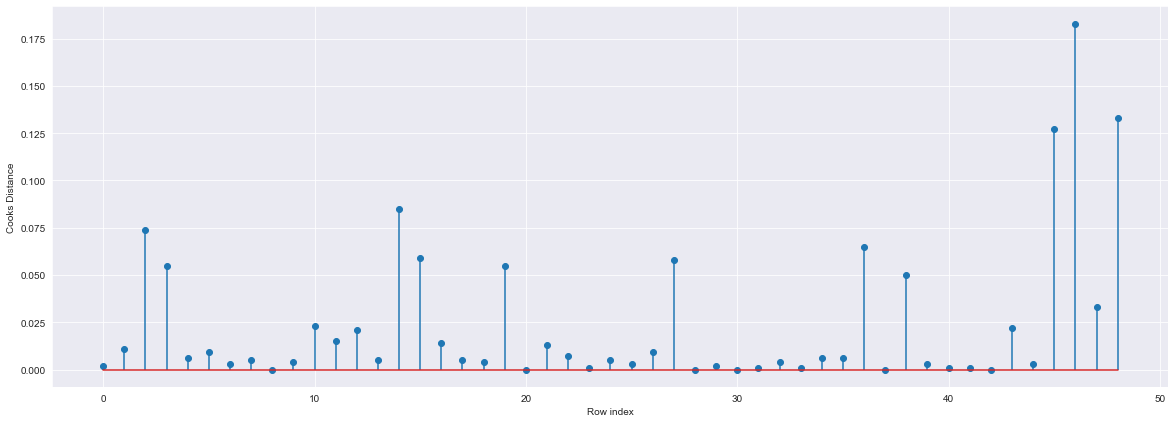

In [135]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df2)),np.round(c_M,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [136]:
#Check the accuracy of the model
final_Mrkt= smf.ols('Prft~RD+Mrkt+Adms',data = df2).fit()

In [137]:
final_Mrkt.rsquared, final_Mrkt.aic

(0.9613162435129847, 1020.5652974526367)

In [138]:
# Model Prediction for new dataset
new_data=pd.DataFrame({"Mrkt":250000,"RD":200000,"Adms":350000},index=[1])
new_data

,Mrkt,RD,Adms
1,250000,200000,350000


In [139]:
final_Mrkt.predict(new_data)

1    207520.741579
dtype: float64

In [140]:
final_Mrkt.predict(df2.iloc[0:4,])

0    190716.676999
1    187537.122227
2    180575.526396
3    172461.144642
dtype: float64

In [141]:
pred_y = final_Mrkt.predict(df2)

In [142]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [143]:
# Table containing R^2 value for each prepared model

In [144]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_Mrkt.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


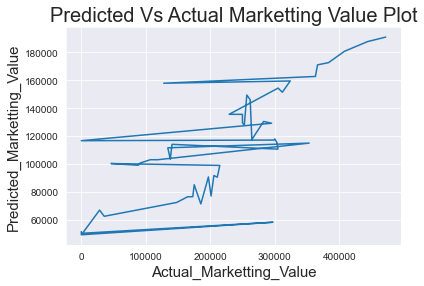

In [145]:

df2.Mrkt
pred_y  
plt.plot(df2.Mrkt,pred_y); plt.xlabel("Actual_Marketting_Value",size=15); plt.ylabel("Predicted_Marketting_Value",size = 15)
plt.title("Predicted Vs Actual Marketting Value Plot", size=20)
plt.show()

# Q.2Consider only the below columns and prepare a prediction model for predicting Price.
Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [146]:
import pandas as pd
import seaborn as sns 
import statsmodels.formula.api as smf

In [147]:
df=pd.read_csv("ToyotaCorolla.csv",encoding="ISO-8859-1")

In [148]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [149]:
# EDA

In [150]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [151]:
print(df.Doors.unique())
print(df.Gears.unique())
print(df.HP.unique())
print(df.cc.unique())
print(df.Quarterly_Tax.unique())
print(df.Weight.unique())
print(df.Age_08_04.unique())

[3 5 4 2]
[5 6 3 4]
[ 90 192  69 110  97  71 116  98  86  72 107  73]
[ 2000  1800  1900  1600  1400  1598 16000  1995  1398  1300  1587  1975
  1332]
[210 100 185  85  19 234  69 283  64 197 163  72  40]
[1165 1170 1245 1185 1105 1065 1120 1100 1255 1270 1110 1195 1180 1075
 1130 1275 1060 1115 1265 1260 1125 1155 1045 1480 1320 1280 1135 1090
 1150 1085 1160 1205 1084 1140 1095 1025 1119 1080 1121 1615 1067 1040
 1030 1055 1050 1103 1070 1035 1015 1000 1078 1079 1109 1020 1010 1114
 1172 1094 1083]
[23 24 26 30 32 27 25 22 31 28 29 20 19 16 17 11 18 13 14  4  8  7 15 10
 12  9  6  2  1 43 38 40 44 41 37 39 42 35 34 33 36 53 51 54 45 55 48 52
 49 56 50 47 46 58 68 59 62 65 67 64 60 61 66 57 63 73 79 78 74 77 69 80
 76 70 71 75 72]


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [153]:
PR=df.iloc[:,2]
Age = df.iloc[:,3]
KM = df.iloc[:,6]
HP = df.iloc[:,8]
CC = df.iloc[:,12]
Drs = df.iloc[:,13]
Grs = df.iloc[:,15]
QT = df.iloc[:,16]
WT = df.iloc[:,17]
df1 = pd.DataFrame({"Price":PR,"Age":Age,"KM":KM,"HP":HP,"CC":CC,"Drs":Drs,"Grs":Grs,"QT":QT,"WT":WT})
df1

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [154]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Drs     1436 non-null   int64
 6   Grs     1436 non-null   int64
 7   QT      1436 non-null   int64
 8   WT      1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [155]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


In [156]:
# Correlation Matrix

In [157]:
df1.corr()

,Price,Age,KM,HP,CC,Drs,Grs,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Drs,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Grs,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


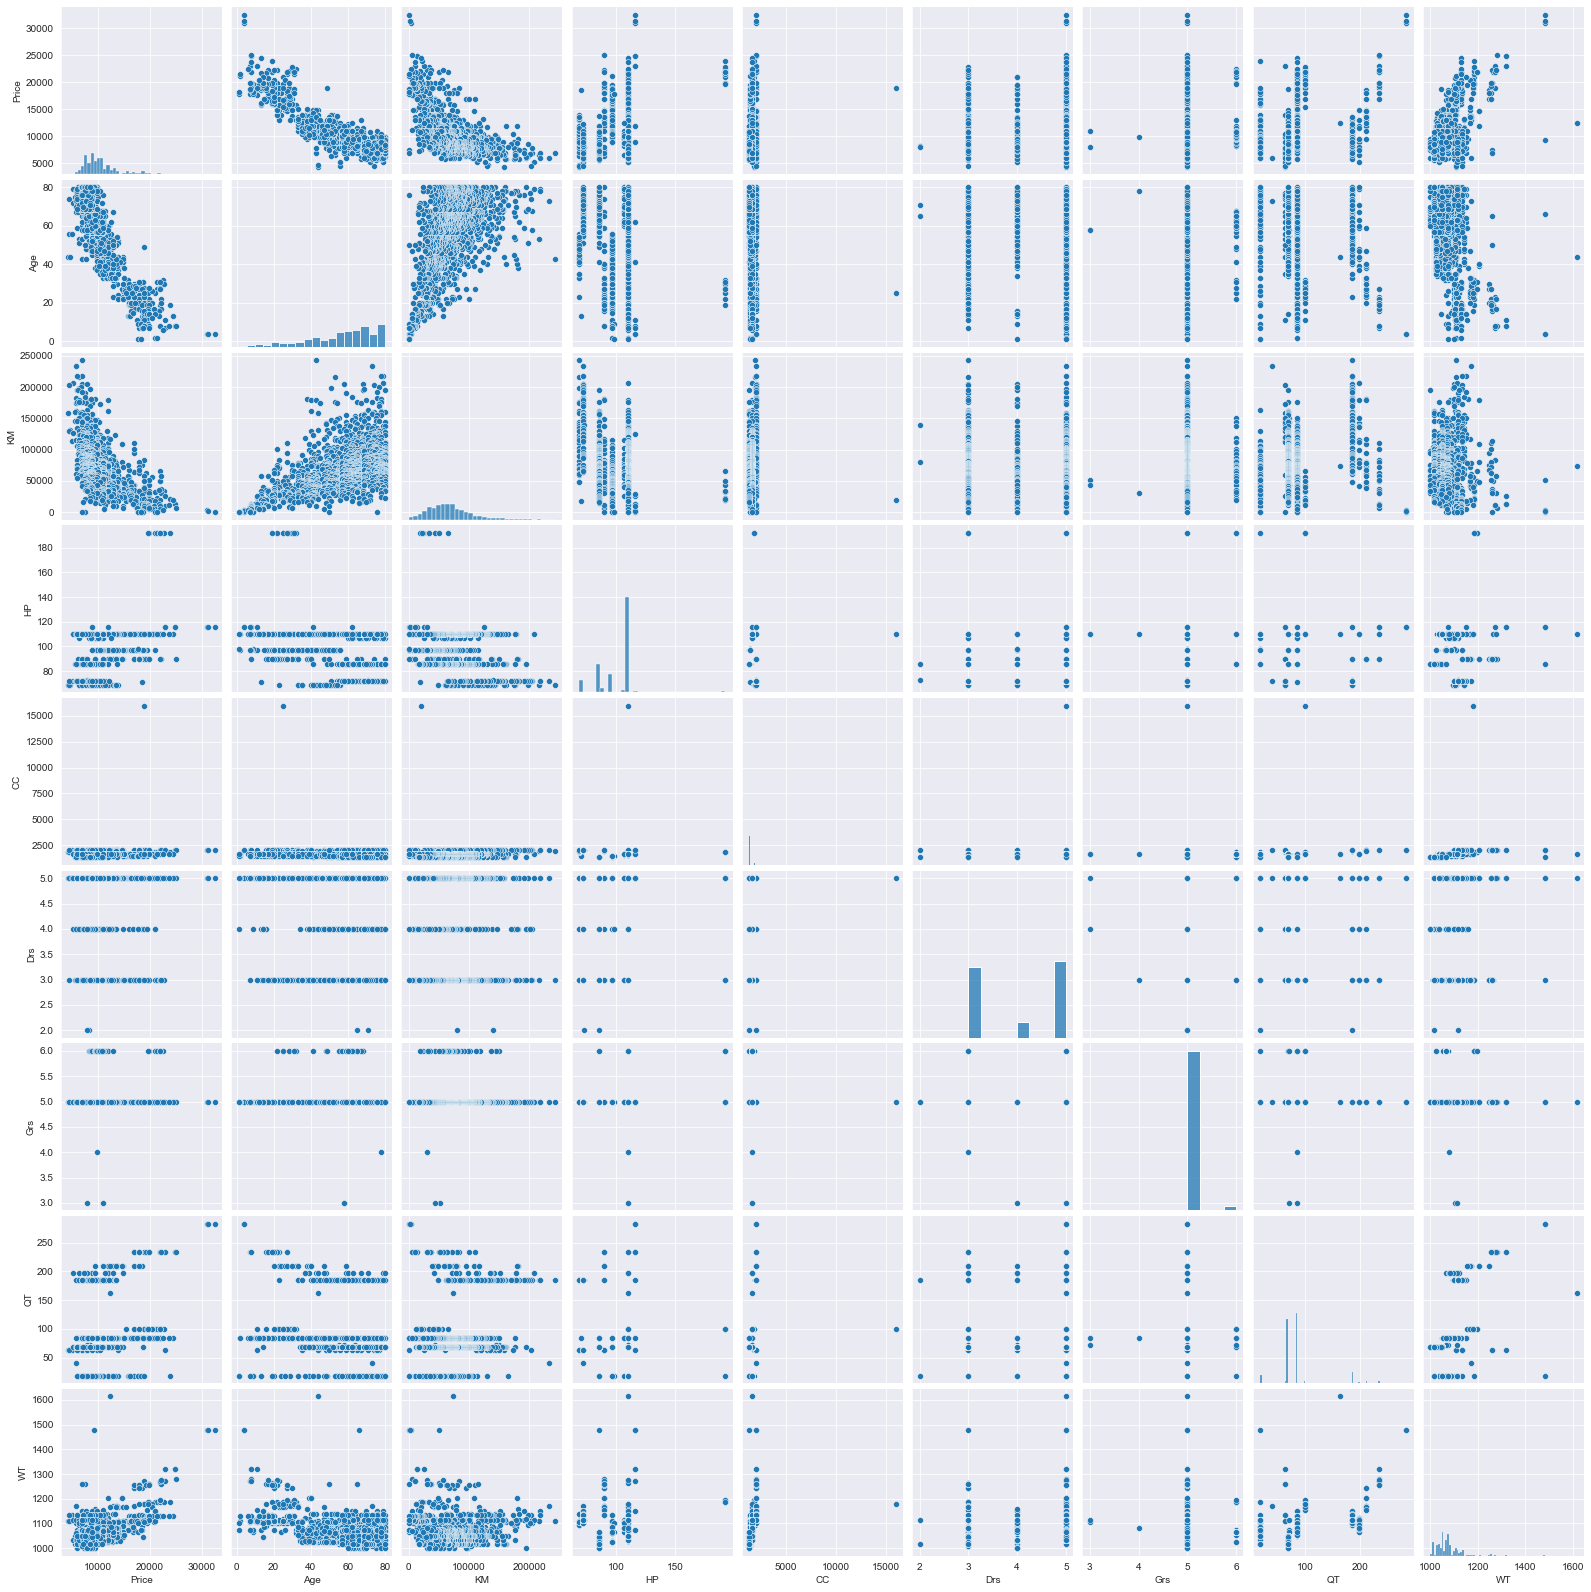

In [158]:
sns.set_style(style="darkgrid")
sns.pairplot(df1)

In [159]:
# Model Building

In [160]:
# Build Model
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = df1).fit()

In [161]:
# Coefficients
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
Drs            -1.616641
Grs           594.319936
QT              3.949081
WT             16.958632
dtype: float64

In [162]:
# t values and p values:
model.tvalues, model.pvalues


(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 CC           -1.344222
 Drs          -0.040410
 Grs           3.016007
 QT            3.014535
 WT           15.879803
 dtype: float64,
 Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 CC            1.790902e-01
 Drs           9.677716e-01
 Grs           2.606549e-03
 QT            2.619148e-03
 WT            2.048576e-52
 dtype: float64)

In [163]:

model.rsquared, model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [164]:
# Simple Linear Regression Models:
Build SLR and MLR models for insignificant variables 'CC' and 'Drs'
Also find their tvalues and pvalues

SyntaxError: invalid syntax (1160182439.py, line 2)

In [ ]:
ml_CC = smf.ols("Price~CC", data=df1).fit()
ml_CC.tvalues, ml_CC.pvalues

In [ ]:
ml_Drs = smf.ols("Price~Drs", data = df1).fit()
ml_Drs.tvalues, ml_Drs.pvalues

In [ ]:
ml_DC = smf.ols("Price~Drs+CC", data = df1).fit()
ml_DC.tvalues, ml_DC.pvalues

# Calculate VIF

In [ ]:
rsq_Age = smf.ols('Age~KM+HP+CC+Drs+Grs+QT+WT', data = df1).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_KM = smf.ols('KM~HP+CC+Drs+Grs+QT+WT+Age', data = df1).fit().rsquared
vif_KM = 1/ (1-rsq_KM)
rsq_HP = smf.ols('HP~CC+Drs+Grs+QT+WT+Age+KM', data = df1).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_CC = smf.ols('CC~Drs+Grs+QT+WT+Age+KM+HP', data = df1).fit().rsquared
vif_CC = 1/(1-rsq_CC)
rsq_Drs = smf.ols('Drs~Grs+QT+WT+Age+KM+HP+CC', data = df1).fit().rsquared
vif_Drs = 1/ (1-rsq_Drs)
rsq_Grs = smf.ols('Grs~QT+WT+Age+KM+HP+CC+Drs', data = df1).fit().rsquared
vif_Grs = 1/(1-rsq_Grs)
rsq_QT = smf.ols('QT~WT+Age+KM+HP+CC+Drs+Grs', data = df1).fit().rsquared
vif_QT = 1/(1-rsq_QT)
rsq_WT = smf.ols('WT~Age+KM+HP+CC+Drs+Grs+QT', data = df1).fit().rsquared
vif_WT = 1/ (1-rsq_WT)



d = {'Variables': ['Age','KM','HP','CC','Drs','Grs','QT','WT'], 'VIF': [vif_Age,vif_KM,vif_HP,vif_CC,vif_Drs,vif_Grs,vif_QT,vif_WT]}
d1 = pd.DataFrame(d)
print(d1)

In [ ]:
#VIF of all the variables < 20 , No collinearity.

# Residual Analysis
Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

In [ ]:
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = df1).fit()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title("Normal Q-Q Plot of residual")

In [ ]:
import numpy as np
print(list(np.where(model.resid<-7000))) # outlier value exists below -7000 so that we use (model.resid<-70000)
print(list(np.where(model.resid>5000)))  # outlier value exists below 5000 so that we use (model.resid>

In [ ]:
# Residual plot for Homoscedasticity or Heteroscedasticity

In [ ]:
model = smf.ols("Price~Age+KM+HP+CC+Drs+Grs+QT+WT", data = df1).fit()

In [ ]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()
#get_standardized_values(df1)

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title("Residual Plot", size=25)
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residual values")
plt.show()


# Residual Vs Regressors

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Age", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"KM", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"HP", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"CC", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Drs", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"Grs", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"QT", fig = fig)
plt.show()

In [ ]:
fig = plt.figure(figsize = (15,10))
fig = sm.graphics.plot_regress_exog(model,"WT", fig = fig)
plt.show()

# Cook's Distance 

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence_CC = model.get_influence()
(c_, _) = model_influence_CC.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(15, 7))
plt.stem(np.arange(len(df1)), np.round(c_, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c_),np.max(c_))

In [ ]:
df1.shape

In [ ]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

influence_plot(model)
plt.show()
# From the above plot, Leverage Value using High Influence Points : Points beyond Leverage_cutof

In [ ]:
df1[df1.index.isin([80])]

In [ ]:
df2=df1.drop(df1.index[80], axis=0).reset_index()
df2.drop(['index'], axis=1, inplace=True)
df2

In [ ]:
# Build Model

In [ ]:

final_Drs = smf.ols('Price~Age+KM+HP+Drs+Grs+QT+WT',data = df2).fit()

In [ ]:
(final_Drs.rsquared, final_Drs.aic, final_Drs.bic)

In [ ]:

final_CC = smf.ols('Price~Age+KM+HP+CC+Grs+QT+WT',data = df2).fit()

In [ ]:
(final_CC.rsquared, final_CC.aic, final_CC.bic)

In [ ]:
# Cook's Distance

In [ ]:
model_influence_CC = final_CC.get_influence()
(c_M, _) = model_influence_CC.cooks_distance

In [ ]:

(np.argmax(c_M),np.max(c_M))

In [ ]:
# Model Prediction for new dataset
new_data=pd.DataFrame({"Drs":3,"Age":24,"KM":58651,"HP":88,"CC":1500,"Grs":5,"QT":100,"WT":1101},index=[1])
new_data

In [ ]:
final_CC.predict(new_data)

In [ ]:
final_CC.predict(df2.iloc[0:9,])

In [ ]:
pred_y = final_CC.predict(df2)

In [ ]:
pred_y

In [ ]:
# Table containing R^2 value for each prepared model

In [ ]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_CC.rsquared]}
table=pd.DataFrame(d2)
table

In [ ]:
# Graph shows relation between Predicted and actual value
import matplotlib.pyplot as plt
df2.CC # Actual Value
pred_y   # Predicted Value
plt.plot(df2.CC,pred_y); plt.xlabel("Actual_CC_Value",size=15); plt.ylabel("Predicted_CC_Value",size = 15)
plt.title("Predicted Vs Actual CC Value Plot", size=20)
plt.show()